In [50]:
# Random Forest

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

%matplotlib inline

In [51]:
# EDA for Social_Network_Ads dataset

df = pd.read_csv(r"C:\Users\nehup\Downloads\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [52]:
# EDA for Social_Network_Ads dataset

df = pd.read_csv(r"C:\Users\nehup\Downloads\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [53]:
print(df.shape)

(400, 5)


In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [55]:
print(df.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


In [56]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [57]:
# To check for duplicates
dups = df.duplicated()
print("Number of duplicate rows = %d " %(dups.sum()))
df[dups]

Number of duplicate rows = 0 


,User ID,Gender,Age,EstimatedSalary,Purchased


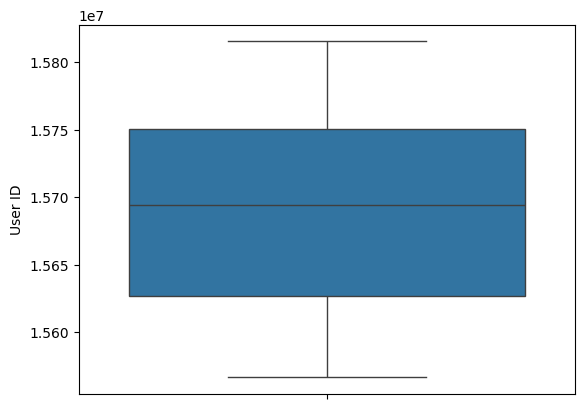

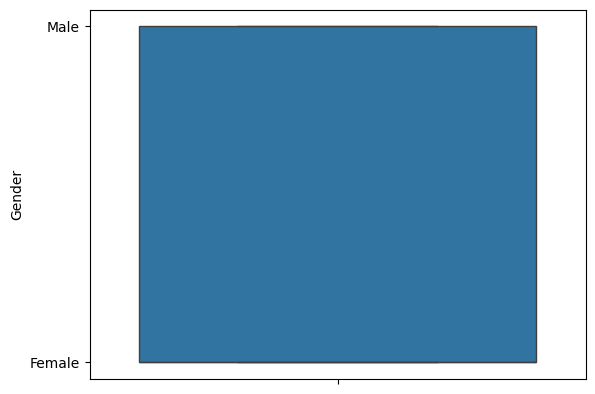

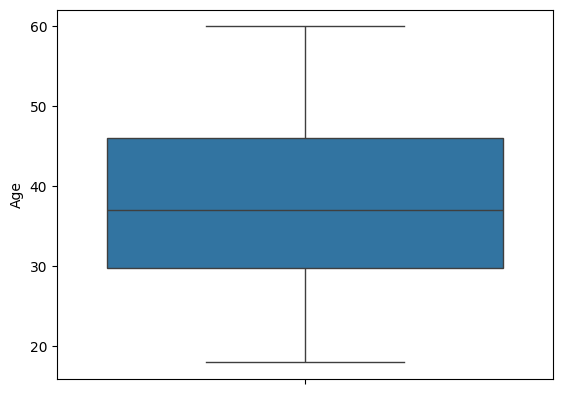

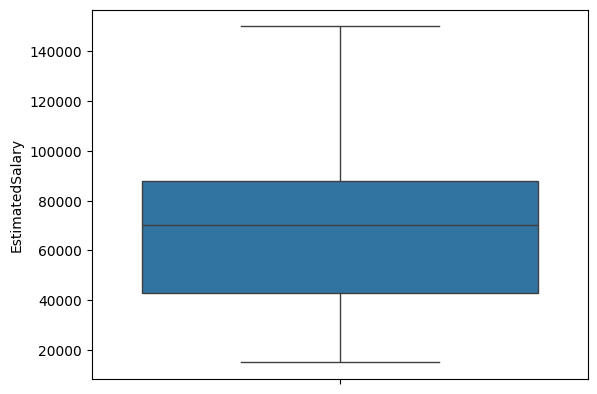

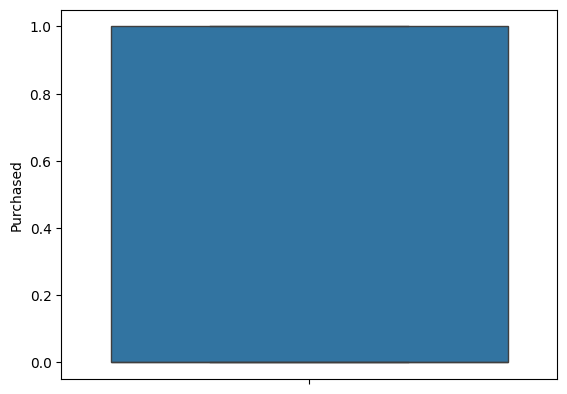

In [58]:
# To check for outliers
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'int64':
        sns.boxplot(df[col])
        plt.show()
# No outliers 

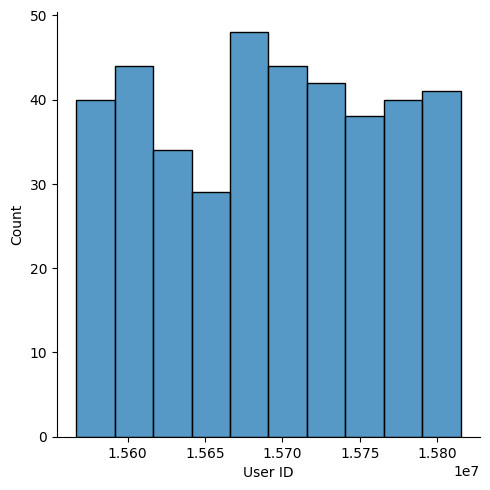

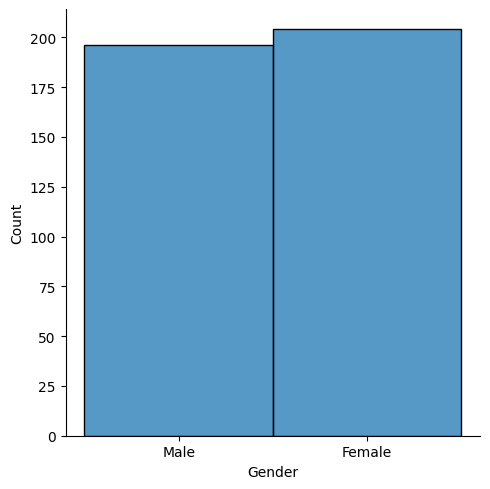

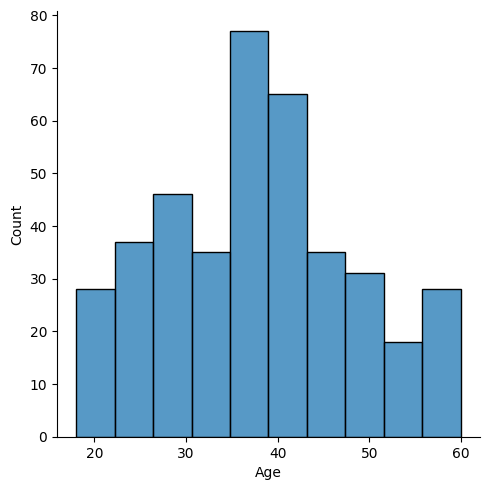

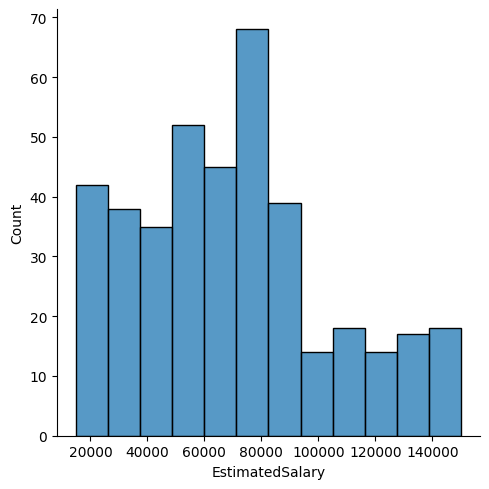

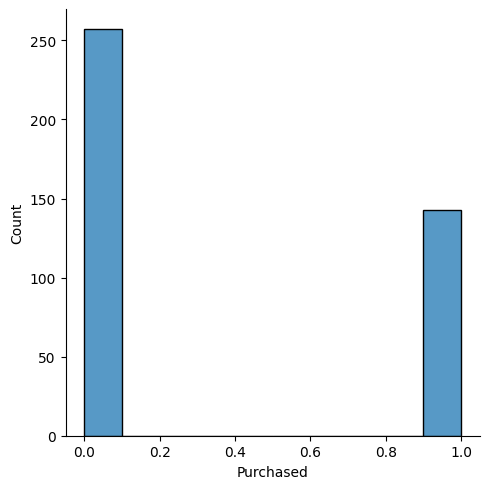

In [59]:
# Univariate analysis
for col in df.columns:
    if (df[col].dtype == 'int64') :
        sns.displot(df[col])
        plt.show()
    elif (df[col].dtype == 'object') :
        sns.displot(df[col])
        plt.show()


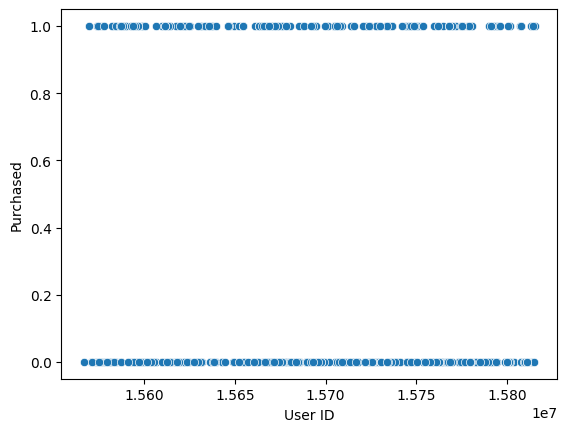

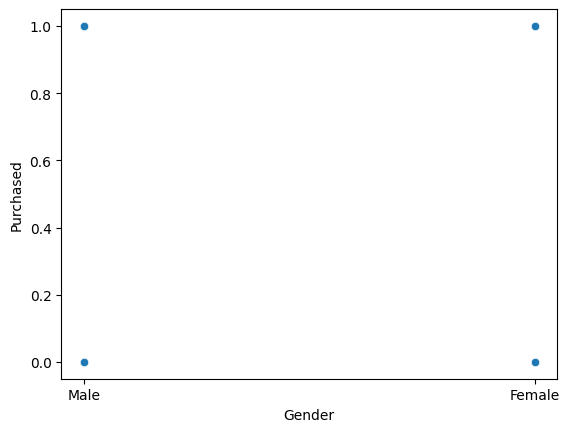

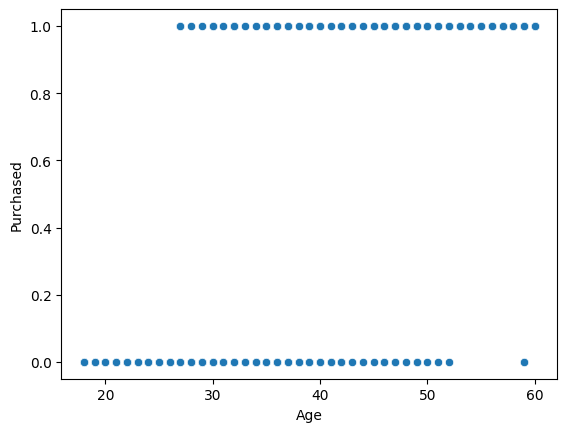

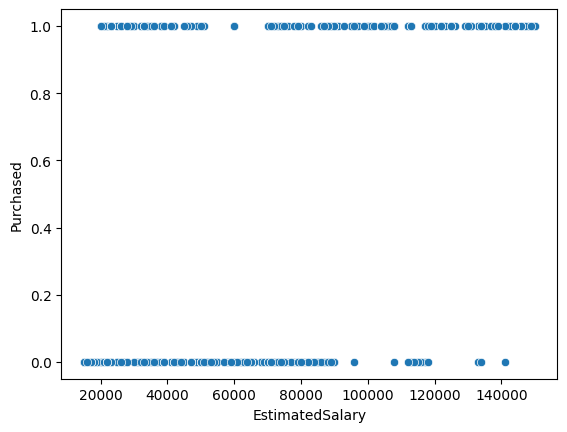

In [60]:
# Bivariate analysis
for col in df.columns:
    if ((df[col].dtype == 'int64' or df[col].dtype == 'object') and col != 'Purchased') :
        sns.scatterplot(x=df[col],y=df['Purchased'])
        plt.show()

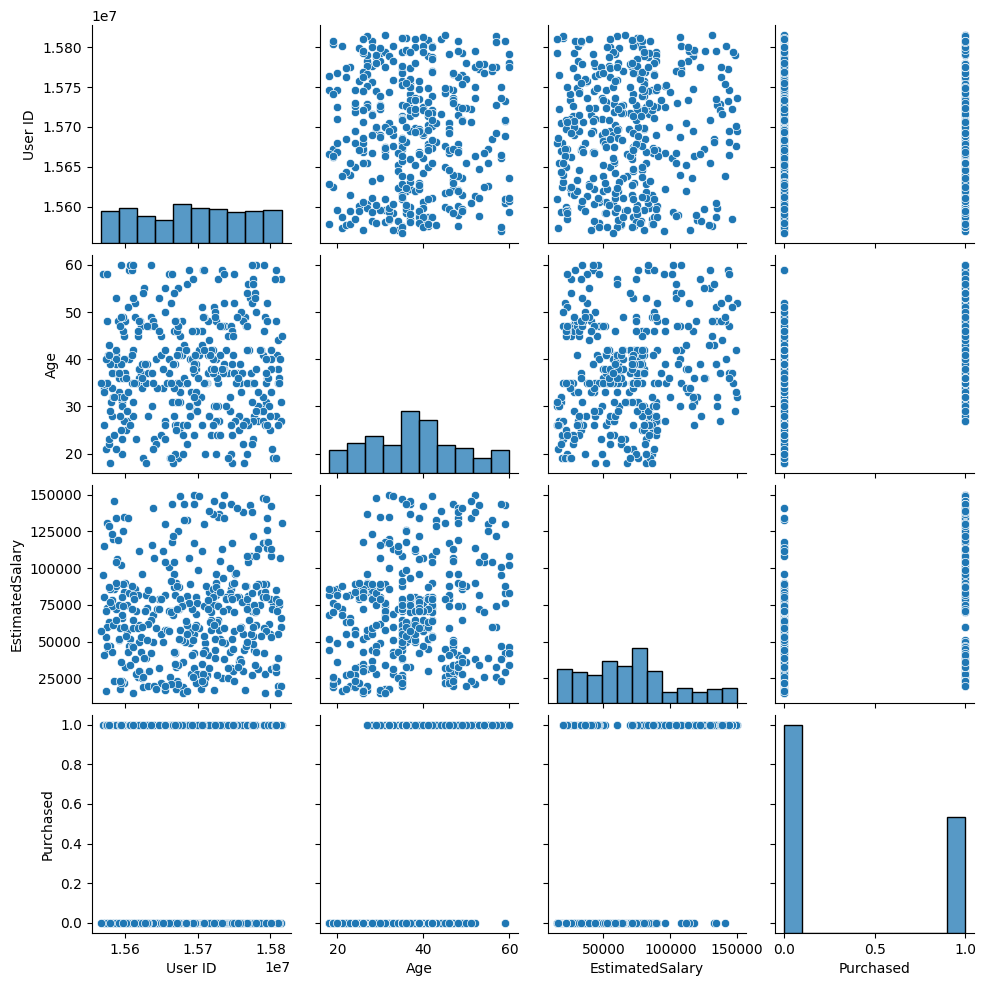

In [61]:
# Multivariate analysis
sns.pairplot(df)
plt.show()

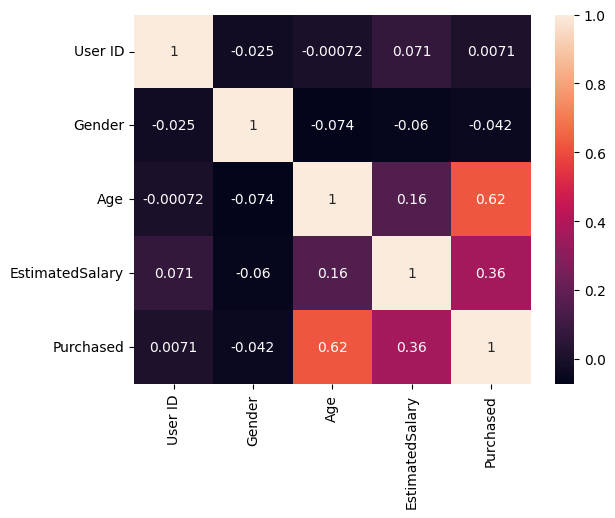

In [62]:
#To Convert categorical data into numerical data

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Correlation analysis

sns.heatmap(df.corr(),annot=True)
plt.show()

In [63]:
# To process Random Forest

#Features and Target
x = df[['Gender', 'Age', 'EstimatedSalary']].values
y = df['Purchased'].values

#Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

# Evaluation
print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred))
print("\nClassification Report = \n",classification_report(y_test, y_pred))
print("\nAccuracy = %.2f" %(accuracy_score(y_test, y_pred)*100))


Confusion Matrix = 
 [[54  4]
 [ 3 19]]

Classification Report = 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.83      0.86      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.91      0.91      0.91        80


Accuracy = 91.25


Feature : 0, Score : 0.01178
Feature : 1, Score : 0.49872
Feature : 2, Score : 0.48950


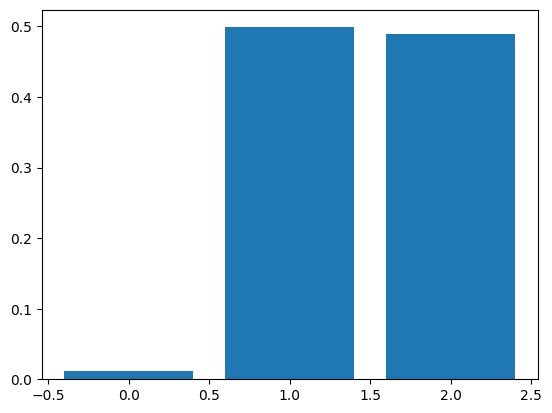

In [ ]:
# Feattures and Importance

importance = rf.feature_importances_
features = df[['Gender', 'Age', 'EstimatedSalary']] 

for i,v in enumerate(importance):
    print('Feature : %0d, Score : %.5f' % (i,v))
    
plt.bar([x for x in range(len(importance))],)
plt.show()